In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('diabetes 2.csv')

In [3]:
df.shape

(768, 10)

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Skin,Outcome
0,6,148,72,35,0,33.6,0.627,50,35,True
1,1,85,66,29,0,26.6,0.351,31,29,False
2,8,183,64,0,0,23.3,0.672,32,0,True
3,1,89,66,23,94,28.1,0.167,21,23,False
4,0,137,40,35,168,43.1,2.288,33,35,True


In [5]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Skin,Outcome
763,10,101,76,48,180,32.9,0.171,63,48,False
764,2,122,70,27,0,36.8,0.340,27,27,False
765,5,121,72,23,112,26.2,0.245,30,23,False
766,1,126,60,0,0,30.1,0.349,47,0,True
767,1,93,70,31,0,30.4,0.315,23,31,False


In [6]:
df.isnull().values.any()

False

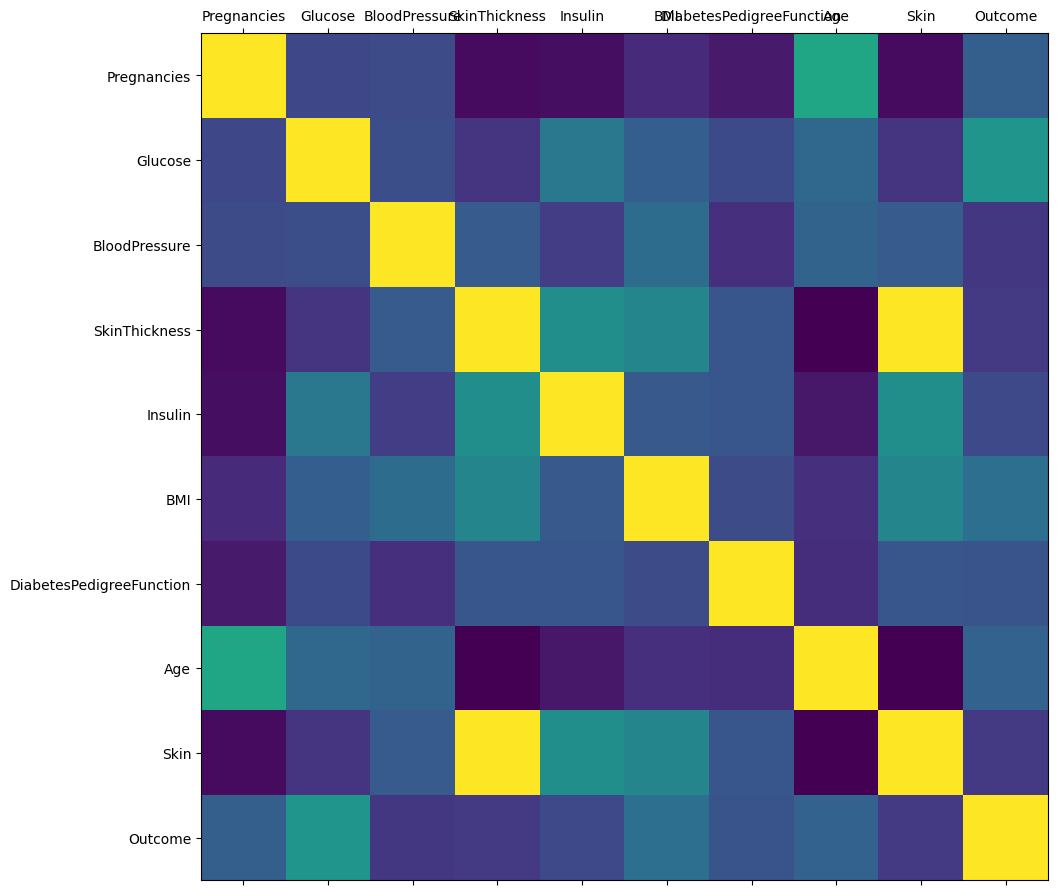

In [7]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(df)

In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Skin,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
Skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [9]:
del df['Skin']

In [10]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


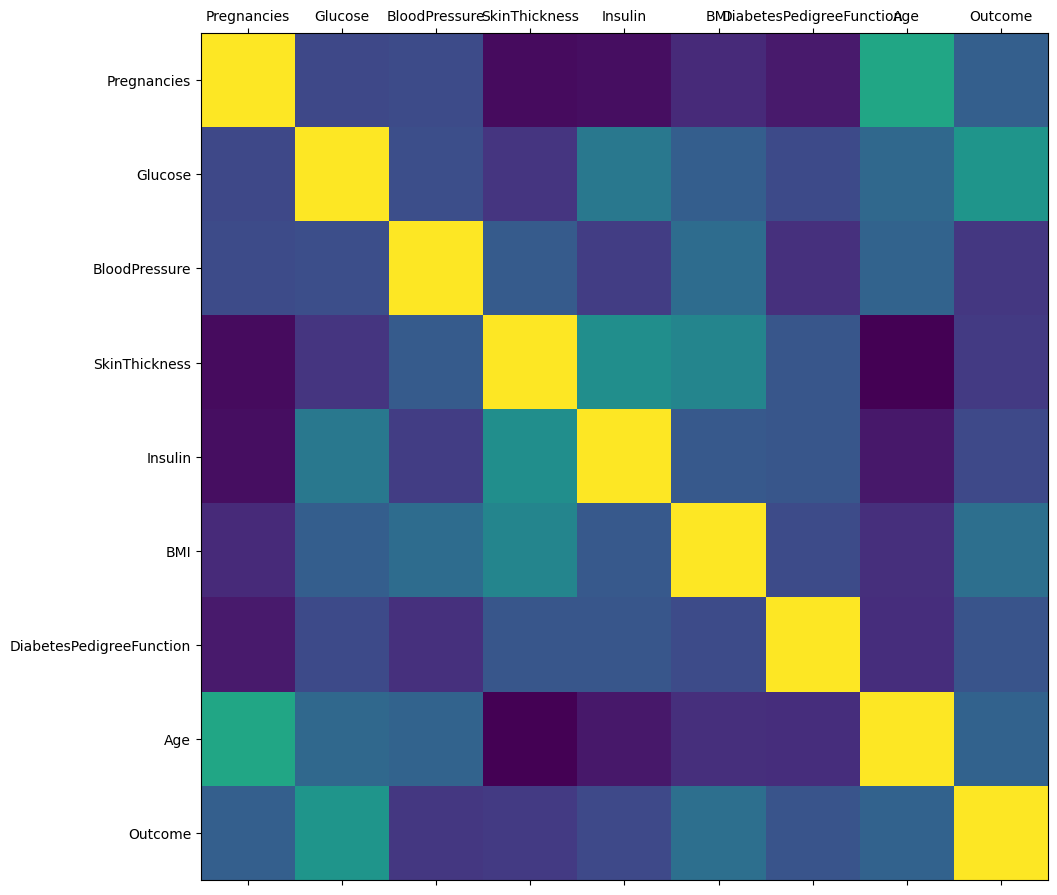

In [11]:
plot_corr(df)

In [12]:
diabetes_map = {True:1, False:0}
df['Outcome'] = df['Outcome'].map(diabetes_map)

In [13]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.isnull().values.any()

False

In [15]:
num_obs = len(df)
num_true = len(df.loc[df['Outcome']==1])
num_false = len(df.loc[df['Outcome']==0])
print("Jumlah terkena diabetes: {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs)*100))
print("Jumlah tidak terkena diabetes: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs)*100))

Jumlah terkena diabetes: 268 (34.90%)
Jumlah tidak terkena diabetes: 500 (65.10%)


In [16]:
from sklearn.model_selection import train_test_split
feature_col_names = list(df.columns[0:8])
predicted_class_name = list(df.columns)[8]
X = df[feature_col_names].values
y = df[predicted_class_name].values
split_test_size = .3
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = split_test_size, random_state=42)

In [17]:
print("{0:0.2f}% ada pada training set".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% ada pada test set".format((len(X_test)/len(df.index))*100))
print("")
print("Jumlah original terkena diabetes: {0} ({1:2.2f}%)".format(len(df.loc[df['Outcome']==1]),
                                                                 (len(df.loc[df['Outcome']==1])/len(df.index))*100))
print("Jumlah original tidak terkena diabetes: {0} ({1:2.2f}%)".format(len(df.loc[df['Outcome']==0]),
                                                                 (len(df.loc[df['Outcome']==0])/len(df.index))*100))
print("")
print("Training True: {0} ({1:2.2f}%)".format(len(y_train[y_train[:]==1]), (len(y_train[y_train[:]==1])/len(y_train)*100)))
print("Training False: {0} ({1:2.2f}%)".format(len(y_train[y_train[:]==0]), (len(y_train[y_train[:]==0])/len(y_train)*100)))
print("")
print("Testing True: {0} ({1:2.2f}%)".format(len(y_test[y_test[:]==1]), (len(y_test[y_test[:]==1])/len(y_test)*100)))
print("Testing False: {0} ({1:2.2f}%)".format(len(y_test[y_test[:]==1]), (len(y_test[y_test[:]==1])/len(y_test)*100)))

69.92% ada pada training set
30.08% ada pada test set

Jumlah original terkena diabetes: 268 (34.90%)
Jumlah original tidak terkena diabetes: 500 (65.10%)

Training True: 188 (35.01%)
Training False: 349 (64.99%)

Testing True: 80 (34.63%)
Testing False: 80 (34.63%)


In [18]:
print("#rows in dataframe {0}".format(len(df)))
for n in feature_col_names:
    print("#rows missing {0}: {1}".format(n, len(df.loc[df[n] == 0])))

#rows in dataframe 768
#rows missing Pregnancies: 111
#rows missing Glucose: 5
#rows missing BloodPressure: 35
#rows missing SkinThickness: 227
#rows missing Insulin: 374
#rows missing BMI: 11
#rows missing DiabetesPedigreeFunction: 0
#rows missing Age: 0


In [19]:
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values=0, strategy="mean")
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [20]:
#untuk mengecek apakah masih ada nilai 0
dff = pd.DataFrame(X_train)
for n in dff.columns:
    print("kolom ke-{0}, jumlah data 0: {1}".format(n, len(dff.loc[dff[n]==0])))

kolom ke-0, jumlah data 0: 0
kolom ke-1, jumlah data 0: 0
kolom ke-2, jumlah data 0: 0
kolom ke-3, jumlah data 0: 0
kolom ke-4, jumlah data 0: 0
kolom ke-5, jumlah data 0: 0
kolom ke-6, jumlah data 0: 0
kolom ke-7, jumlah data 0: 0


In [21]:
from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()
nbtrain = modelnb.fit(X_train, y_train)
nbtrain.class_count_

array([349., 188.])

In [22]:
y_pred = nbtrain.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [24]:
nbtrain.predict_proba(X_test)

array([[8.39478921e-01, 1.60521079e-01],
       [9.34399359e-01, 6.56006408e-02],
       [9.77980616e-01, 2.20193841e-02],
       [8.13119826e-01, 1.86880174e-01],
       [3.57882617e-01, 6.42117383e-01],
       [5.38930063e-01, 4.61069937e-01],
       [9.99279222e-01, 7.20777545e-04],
       [5.79676588e-01, 4.20323412e-01],
       [5.43344773e-01, 4.56655227e-01],
       [1.79323216e-01, 8.20676784e-01],
       [7.77328004e-01, 2.22671996e-01],
       [9.09747165e-03, 9.90902528e-01],
       [3.31374952e-01, 6.68625048e-01],
       [8.68907960e-01, 1.31092040e-01],
       [9.87443612e-01, 1.25563878e-02],
       [8.15939389e-01, 1.84060611e-01],
       [9.46420254e-01, 5.35797455e-02],
       [9.82279280e-01, 1.77207200e-02],
       [1.35420656e-01, 8.64579344e-01],
       [6.46626062e-01, 3.53373938e-01],
       [8.77258514e-01, 1.22741486e-01],
       [9.73016075e-01, 2.69839246e-02],
       [1.38777611e-01, 8.61222389e-01],
       [9.86804088e-01, 1.31959119e-02],
       [3.654159

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[118,  33],
       [ 28,  52]])

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



<Figure size 600x400 with 0 Axes>

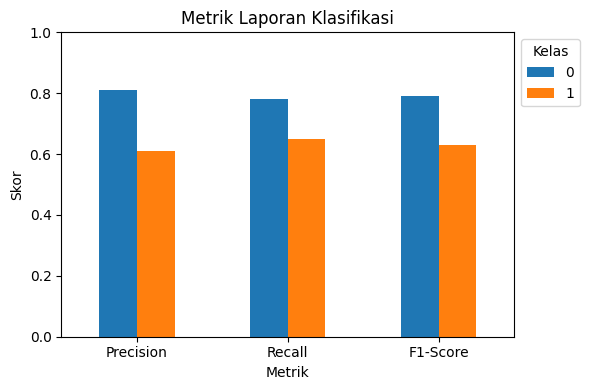

In [28]:
data = {
    'Class': ['0', '1'],
    'Precision': [0.81, 0.61],
    'Recall': [0.78, 0.65],
    'F1-Score': [0.79, 0.63]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Membuat plot dengan ukuran grafik yang lebih kecil
plt.figure(figsize=(6, 4))
df.set_index('Class').T.plot(kind='bar', figsize=(6, 4))


# Menyesuaikan plot
plt.title('Metrik Laporan Klasifikasi')
plt.ylabel('Skor')
plt.xlabel('Metrik')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title='Kelas', bbox_to_anchor=(1, 1), loc='upper left')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [29]:
import pickle

In [31]:
filename = 'diabetes_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(nbtrain, file)

print(f"Model berhasil disimpan ke {filename}")

Model berhasil disimpan ke diabetes_model.pkl
